<a href="https://colab.research.google.com/github/pmukeshreddy/hands-on-machine-leaning-book-projects/blob/main/chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = mnist.data,mnist.target
X.shape
y=y.astype(int)

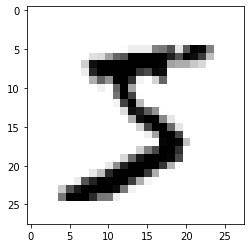

In [ ]:
import matplotlib.pyplot as pyt
import matplotlib as mpt
import numpy as np
some_digit = X.iloc[0]
some_d_q = some_digit.to_numpy()
some_re_w = some_d_q.reshape(28,28)
pyt.imshow(some_re_w,cmap=mpt.cm.binary,interpolation="nearest")



In [ ]:
X_train = X[:60000].to_numpy()
X_test = X[60000:].to_numpy()
y_train = y[:60000]
y_test = y[60000:]


In [ ]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [ ]:
some_digit_5 = some_digit
some_digit_idk =X.iloc[3].to_numpy()
print(sgd_clf.predict([some_digit]))
print(sgd_clf.predict([some_digit_idk]))

[ True]
[False]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_cf = clone(sgd_clf)
    x_train_folds = X.loc[train_index]
    x_test_folds = X.loc[test_index]
    y_train_folds = y_train_5.loc[train_index]
    y_test_folds = y_train_5.loc[test_index]
    
    clone_cf.fit(x_train_folds,y_train_folds)
    y_pridect = clone_cf.predict(x_test_folds)
    n_correct = sum(y_pridect == y_test_folds)
    print(n_correct/len(y_pridect))
    
    


0.9669
0.91625
0.96785


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")


array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.base import BaseEstimator
class Never5classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)   

In [ ]:
never_5_clf = Never5classifier()
print(never_5_clf.predict(X))
print(sgd_clf.predict(X))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[ True False False ... False  True False]


C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


In [ ]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict
c_pri = cross_val_predict(sgd_clf,X_train,y_train_5,cv=4)
c_pri

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,c_pri)

array([[53263,  1316],
       [ 1041,  4380]], dtype=int64)

In [ ]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,c_pri))
print(recall_score(y_train_5,c_pri))

0.7689606741573034
0.8079690094078583


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,c_pri)

0.7879823693442477

In [ ]:
threhold=0
d_score = sgd_clf.decision_function([some_digit])
d_score
ans_b_on_dscore = (d_score>threhold)
ans_b_on_dscore


array([ True])

In [ ]:
threhold=8000
ans_b_on_dscore = (d_score>threhold)
ans_b_on_dscore

array([False])

In [ ]:
len(c_pri)

60000

In [ ]:
y_pridect_d_s = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_pridect_d_s

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recall,threshold=precision_recall_curve(y_train_5,y_pridect_d_s)


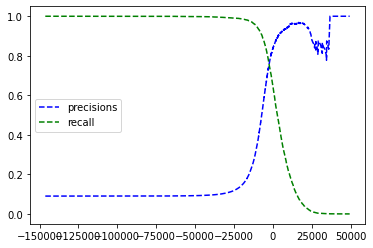

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recall, threshold):
    pyt.plot(threshold, precisions[:-1], "b--", label="precisions")
    pyt.plot(threshold, recall[:-1], "g--", label="recall")
    pyt.legend()


plot_precision_recall_vs_threshold(precisions, recall, threshold)
    


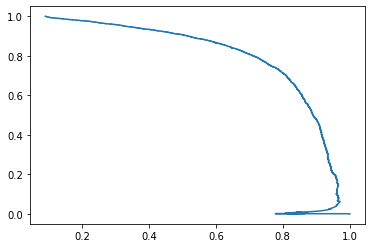

In [ ]:
pyt.plot(precisions, recall)
pyt.show()


In [ ]:
threshold_precsion_90 = threshold[np.argmax(precisions>=0.90)]
threshold_precsion_90

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_pridect_d_s>=threshold_precsion_90)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_train_pred_90)


0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706

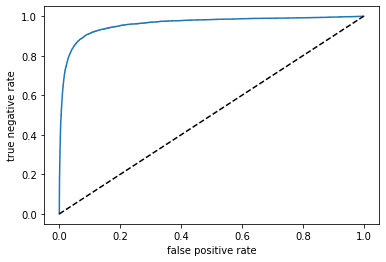

In [ ]:
from sklearn.metrics import roc_curve

fpr,tnr,threhold = roc_curve(y_train_5,y_pridect_d_s)

def plot_roc_curve(fpr,tpr,label=None):
    pyt.plot(fpr,tpr)
    pyt.plot([0,1],[0,1],"k--")
    pyt.xlabel("false positive rate")
    pyt.ylabel("true negative rate")

plot_roc_curve(fpr,tnr)
    
    

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_pridect_d_s)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probalblit_foreat = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [ ]:
w_q=cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [ ]:
print(precision_score(y_train_5,w_q))
print(recall_score(y_train_5,w_q))


0.9905083315756169
0.8662608374838591


In [ ]:
y_probalblit_foreat

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

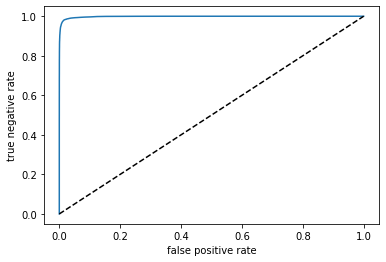

In [ ]:
y_postive_scores = y_probalblit_foreat[:,1]
fpr_1,tpr_1,threshold_1 = roc_curve(y_train_5,y_postive_scores)

plot_roc_curve(fpr_1,tpr_1)

In [ ]:
roc_auc_score(y_train_5,y_postive_scores)

0.9983436731328145

In [ ]:
muliti_testing = sgd_clf.fit(X,y)
print(sgd_clf.predict([some_digit]))

[3]


C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
scores_of_df = sgd_clf.decision_function([some_digit])
scores_of_df

C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-21858.88421853, -17054.58543894,  -6413.85672128,
           627.51239784, -17593.3441168 ,   -208.68886561,
        -19874.01315767, -15167.12515145,  -7890.74081026,
        -10509.26427149]])

In [ ]:
np.argmax(scores_of_df>=5)
sgd_clf.classes_
sgd_clf.classes_[3]


3

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
OvsO = OneVsOneClassifier(SGDClassifier(random_state=42))
OvsO.fit(X,y)
OvsO.predict([some_digit])

C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5])

In [ ]:
len(OvsO.estimators_)

45

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
Ovsr = OneVsRestClassifier(SGDClassifier(random_state=42))
Ovsr.fit(X_train,y_train)
Ovsr.predict([some_digit])

array([5])

In [ ]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5])

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
sccaler =StandardScaler()
X_train_scaled = sccaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

In [ ]:
y_prepared = cross_val_predict(sgd_clf,
                               X_train,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_prepared)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

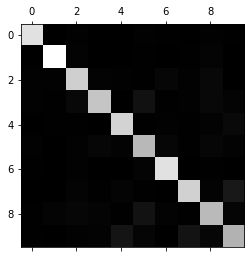

In [ ]:
pyt.matshow(conf_mx,cmap=pyt.cm.gray)
pyt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [ ]:
norm_conf_mx = conf_mx/row_sums
norm_conf_mx

array([[9.51375992e-01, 0.00000000e+00, 1.02988350e-02, 1.68833361e-03,
        2.70133378e-03, 8.44166807e-03, 7.76633463e-03, 1.18183353e-03,
        1.11430019e-02, 5.40266757e-03],
       [4.44971818e-04, 9.48234945e-01, 1.40907743e-02, 3.11480273e-03,
        2.37318303e-03, 6.97122516e-03, 2.22485909e-03, 4.00474637e-03,
        1.61673094e-02, 2.37318303e-03],
       [1.20845921e-02, 9.39912722e-03, 8.68412219e-01, 1.49378986e-02,
        1.15810675e-02, 6.54582075e-03, 2.73581739e-02, 1.10775428e-02,
        3.55824102e-02, 3.02114804e-03],
       [9.46012070e-03, 5.21937694e-03, 3.53938999e-02, 8.05904420e-01,
        3.75142717e-03, 7.19295384e-02, 5.21937694e-03, 9.13390964e-03,
        3.52307943e-02, 1.87571359e-02],
       [1.88291681e-03, 4.45053064e-03, 7.87401575e-03, 1.02704553e-03,
        9.06881205e-01, 4.45053064e-03, 1.24957206e-02, 5.47757617e-03,
        1.48921602e-02, 4.05682985e-02],
       [1.25438111e-02, 4.24275964e-03, 1.06991330e-02, 2.76701716e-02,
   

In [ ]:
np.fill_diagonal(norm_conf_mx,0)

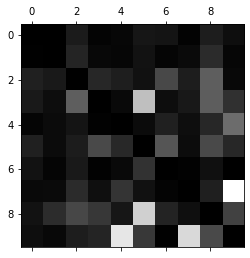

In [ ]:
pyt.matshow(norm_conf_mx,cmap=pyt.cm.gray)

In [ ]:
cl_a,cl_b=3,5
X_aa = X_train[(y_train==cl_a)&(y_prepared==cl_a)]
X_ab = X_train[(y_train==cl_a)&(y_prepared==cl_b)]
X_ba = X_train[(y_train==cl_b)&(y_prepared==cl_a)]
X_bb = X_train[(y_train==cl_b)&(y_prepared==cl_b)]

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pyt.imshow(image, cmap=mpt.cm.binary, **options)
    pyt.axis("off")


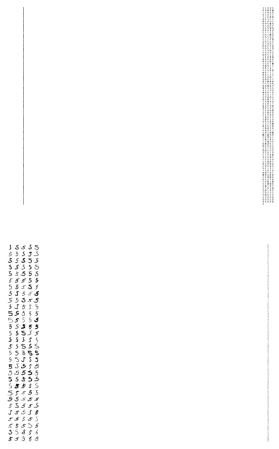

In [ ]:
pyt.figure(figsize=(8,8))
pyt.subplot(221);
plot_digits(X_aa,5)
pyt.subplot(222);
plot_digits(X_ab, 5)
pyt.subplot(223);
plot_digits(X_ba, 5)
pyt.subplot(224);
plot_digits(X_bb, 5)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_tran_large = (y_train>=7)
y_tran_odd = (y_train % 2==1)
y_multi = np.c_[y_tran_large,y_tran_odd]
knclass = KNeighborsClassifier()
knclass.fit(X_train,y_multi)


KNeighborsClassifier()

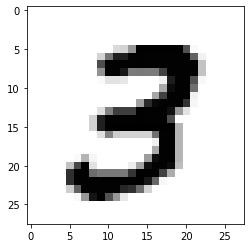

In [ ]:

def showd(s_d,i):
   s_d = X.iloc[i]
   s_d_x = X.iloc[i].to_numpy()
   r=s_d_x.reshape(28,28)
   pyt.imshow(r,cmap=mpt.cm.binary,interpolation="nearest")
showd(X,7)   


In [ ]:
knclass.predict([s_d_x])

array([[ True,  True]])

In [ ]:
r_predicted = cross_val_predict(knclass, X_train, y_multi, cv=3)
f1_score(y_multi, r_predicted, average="macro")


0.976410265560605

In [ ]:
noise = np.random.randint(1,100,(len(X_train),784))
X_mod = X_train + noise
noise = np.random.randint(1, 100, (len(X_test), 784))
X_t_mod = X_test + noise


In [ ]:
knclass.fit(X_mod,X_train)
clean = knclass.predict(X_test)



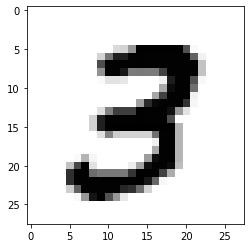

In [ ]:
showd(X_mod,7)

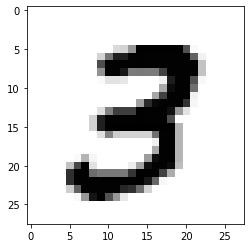

In [ ]:
showd(clean,7)